In [8]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [9]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [10]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [11]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [39]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Sport' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [13]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1973: 1, 1975: 3, 1976: 4, 1977: 3, 1978: 6, 1979: 9, 1980: 2, 1982: 3, 1983: 1, 1984: 4, 1985: 3, 1986: 8, 1987: 2, 1988: 7, 1989: 3, 1990: 3, 1991: 4, 1992: 9, 1993: 1, 1994: 11, 1995: 1, 1996: 9, 1997: 1, 1998: 7, 1999: 3, 2000: 13, 2001: 5, 2002: 3, 2003: 5, 2004: 4, 2005: 15, 2006: 16, 2007: 11, 2008: 12, 2009: 6, 2010: 5, 2011: 8, 2012: 4, 2013: 1, 2015: 2}})

In [14]:
history_df

,count,rolling mean,difference from mean
1980,2,NaN,NaN
1981,0,NaN,NaN
1982,3,NaN,NaN
1983,1,NaN,NaN
1984,4,NaN,NaN
1985,3,2.0,1.500000
1986,8,2.2,3.636364
1987,2,3.8,0.526316
1988,7,3.6,1.944444
1989,3,4.8,0.625000


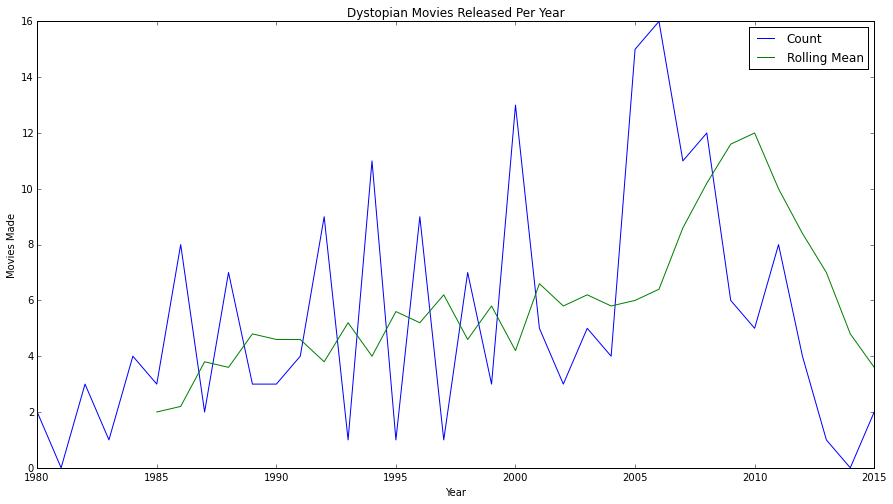

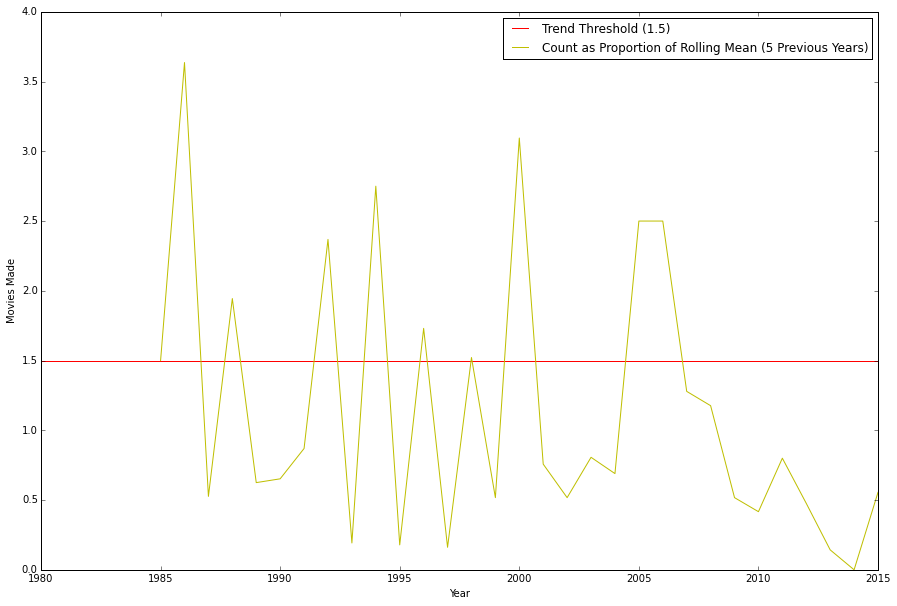

In [53]:
df = history_df.reset_index()
df['cutoff'] = 1.5
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = df['cutoff']
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
count_line = plt.plot(date, count, label=count)
rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
plt.legend(['Count','Rolling Mean'])
plt.title('Dystopian Movies Released Per Year')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

# red dashes, blue squares and green triangles
figure(figsize=(15,10))
count_line = plt.plot(date, cutoff, 'r-', label=count)
rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
plt.legend(['Trend Threshold (1.5)', 'Count as Proportion of Rolling Mean (5 Previous Years)'])
plt.title('')
plt.ylabel('Movies Made')
plt.xlabel('Year')
plt.show()

In [27]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Sport' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [28]:
history_dic

defaultdict(<type 'dict'>, {1973: {'The Last American Hero': defaultdict(<type 'dict'>, {'date': '27 July 1973', 'screens': 'n/a', 'opening': 'n/a'})}, 1975: {'Cornbread, Earl and Me': defaultdict(<type 'dict'>, {'date': '21 May 1975', 'screens': 'Error', 'opening': 'N/A'}), 'Rollerball': defaultdict(<type 'dict'>, {'date': '25 June 1975', 'screens': 'Error', 'opening': 'N/A'}), 'Hard Times': defaultdict(<type 'dict'>, {'date': '4 September 1975', 'screens': 'Error', 'opening': 'N/A'})}, 1976: {'Gus': defaultdict(<type 'dict'>, {'date': '7 July 1976', 'screens': 'n/a', 'opening': 'n/a'}), 'The Bingo Long Traveling All-Stars  Motor Kings': defaultdict(<type 'dict'>, {'date': '17 November 1976', 'screens': 'Error', 'opening': 'N/A'}), 'Rocky': defaultdict(<type 'dict'>, {'date': '3 December 1976', 'screens': 'Error', 'opening': 'N/A'}), 'The Bad News Bears': defaultdict(<type 'dict'>, {'date': '7 April 1976', 'screens': 'n/a', 'opening': 'n/a'})}, 1977: {'The Bad News Bears in Breaking T

In [29]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [30]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1979,Rocky II,1979-06-15,780,6390537,8192.996154
1,1979,The Champ,1979-04-04,563,1972684,3503.879218
2,1980,Caddyshack,1980-07-25,656,3142689,4790.684451
3,1982,Rocky III,1982-05-28,939,12431486,13239.069223
4,1982,Six Pack,1982-07-16,504,1946418,3861.940476
5,1983,All the Right Moves,1983-10-21,229,1601167,6991.995633
6,1984,Hot Dog... The Movie,1984-01-13,1273,4506756,3540.263943
7,1984,Making the Grade,1984-05-18,1197,1760856,1471.057644
8,1984,Oxford Blues,1984-08-24,1075,2486418,2312.946977
9,1984,The Natural,1984-05-11,989,5088381,5144.975733


In [48]:
trend = genre1[86:107]
#trend = trend[trend.screens > 1000]


trend

,level_0,level_1,date,screens,opening,normalized_opening
86,2005,Cinderella Man,2005-06-03,2812,18320205,6515.008890
87,2005,Coach Carter,2005-01-14,2524,29168180,11556.331220
88,2005,Dreamer: Inspired by a True Story,2005-10-21,2007,9178233,4573.110613
89,2005,Lords of Dogtown,2005-06-03,1865,5623373,3015.213405
90,2005,The Game of Their Lives,2005-04-22,64,175336,2739.625000
91,2005,The Greatest Game Ever Played,2005-09-30,1014,3657322,3606.826430
92,2005,The Ringer,2005-12-23,1829,5158795,2820.554948
93,2005,Two for the Money,2005-10-07,2391,8703240,3640.000000
94,2006,Annapolis,2006-01-27,1605,7681171,4785.776324
95,2006,Beer League,2006-09-15,164,302908,1847.000000


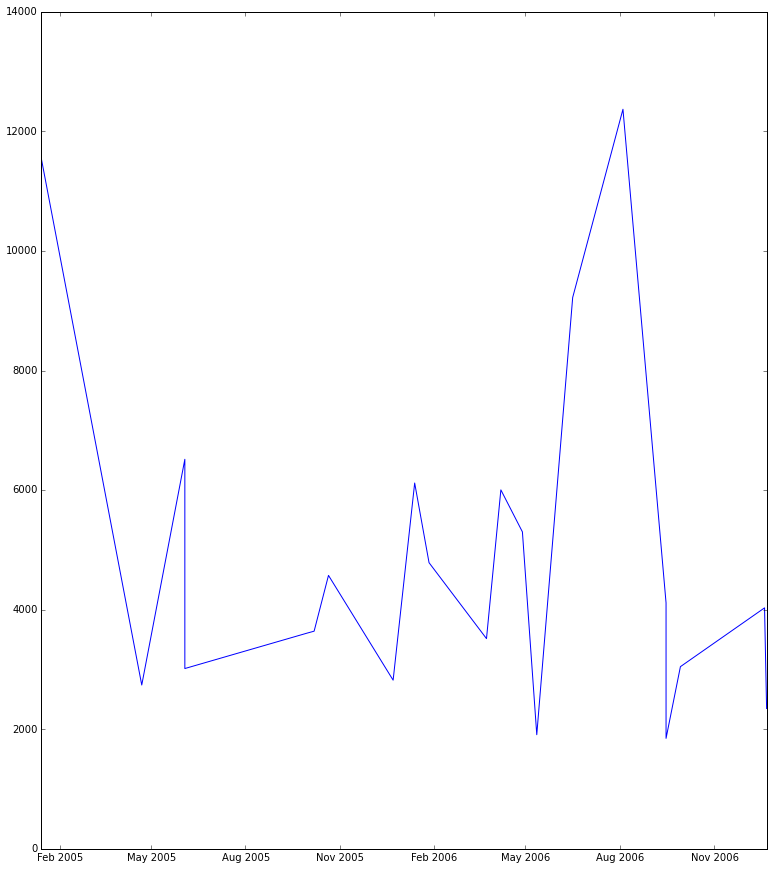

In [49]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

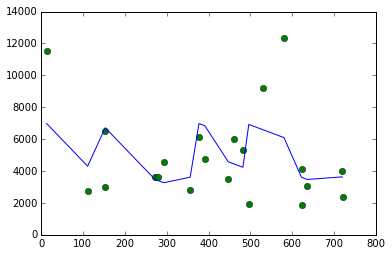

In [50]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2005-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season + level_0', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [51]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.088
Date:                Thu, 08 Oct 2015   Prob (F-statistic):              0.406
Time:                        18:39:08   Log-Likelihood:                -193.67
No. Observations:                  21   AIC:                             399.3
Df Residuals:                      15   BIC:                             405.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept        -7.155e+06   5.66e+06     -1.264      0.226     -1.92e+07  4.91e+06
season[T.Spring]  -746.9009   2229.356     -0.335      0.742     -5498.660  4004.858
season[T.Summer]  2076.9311   1909.772      1.088      0.294     -1993.651  6147.514
season[T.Winter]   965.9655   1786.871      0.541      0.597     -2842.659  4774.590
time_delta_num      -9.8129      6.894     -1.423      0.175       -24.507     4.881
level_0           3571.8322   2824.573      1.265      0.225     -2448.602  9592.266
==============================================================================
Omnibus:                        3.512   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.675
Skew:                           0.549   Prob(JB):                        0.433
Kurtosis:                       3.841   Cond. No.                     1.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
trend = trend.reset_index()
with open('sport_df.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)